In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class PCA:
    def fit_transform(self, X, n_components=2):  
        self.n_samples = X.shape[0]
        self.n_components = n_components
        self.A = self.standardize_data(X)
        covariance_matrix = self.get_covariance_matrix()
        eigenvectors = self.get_eigenvectors(covariance_matrix)
        projected_matrix = self.project_matrix(eigenvectors)
        return projected_matrix

    def standardize_data(self, X):
        numerator = X - np.mean(X, axis=0)
        denominator = np.std(X, axis=0)
        return numerator / denominator
    
    def get_covariance_matrix(self, ddof=0):
        C = np.dot(self.A.T, self.A) / (self.n_samples-ddof)
        return C

    def get_eigenvectors(self, C):
        eigenvalues, eigenvectors = np.linalg.eig(C)
        n_cols = np.argsort(eigenvalues)[::-1][:self.n_components]
        selected_vectors = eigenvectors[:, n_cols]
        return selected_vectors

    def project_matrix(self, eigenvectors):
        P = np.dot(self.A, eigenvectors)
        return P

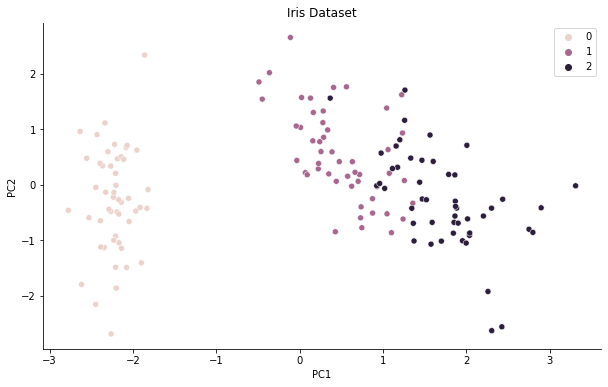

In [13]:
from sklearn import datasets

# load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# instantiate and fit_transform PCA
pca = PCA()
X_pca = pca.fit_transform(X, n_components=2)

# plot results
fig, ax = plt.subplots(1, 1, figsize=(10,6))

sns.scatterplot(
    x = X_pca[:,0],
    y = X_pca[:,1],
    hue=y
)

ax.set_title('Iris Dataset')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

sns.despine()